## Implement the following classifiers in R
### 1. Decision Trees
### 2. Naive Bayes Classifiers
### 3. K-NN Classifiers
### 4. Support Vector Machines(SVM’s)

## Decision Tree

In [1]:
#install.packages("party")
#install.packages('caTools')
#install.packages('e1071')
#install.packages('caret')
library(caTools)
library(class)


Warning message:
"package 'caTools' was built under R version 3.6.3"

In [2]:
library(party)

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"

In [3]:
input.dat = data.frame(iris)
head(input.dat)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
is.null(input.dat)

[1] FALSE

In [5]:
#Spliting the dataset in train and test dataset
split = sample.int(n=nrow(input.dat), size=round(.75*(nrow(input.dat))),replace=FALSE)
train_cl = input.dat[split,]
test_cl = input.dat[-split,]
dim(train_cl)


[1] 112   5

In [6]:
dim(test_cl)

[1] 38  5

In [7]:
# Create the tree.
output.tree=ctree(Species~. , data = train_cl)
summary(output.tree)

    Length      Class       Mode 
         1 BinaryTree         S4 

In [8]:
#Predicting the values for the test cases
y_predict=predict(output.tree,test_cl)
y_predict


[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor virginica  versicolor virginica  virginica 
[31] virginica  virginica  versicolor versicolor virginica  virginica 
[37] virginica  virginica 
Levels: setosa versicolor virginica

In [9]:
#Evaluating the model
table_mat=table(y_predict,test_cl$Species)
table_mat

            
y_predict    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         11         3
  virginica       0          0         9

In [10]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [11]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [12]:
#Creating the confusion matrix
confusionMatrix(table_mat)

Confusion Matrix and Statistics

            
y_predict    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         11         3
  virginica       0          0         9

Overall Statistics
                                          
               Accuracy : 0.9211          
                 95% CI : (0.7862, 0.9834)
    No Information Rate : 0.3947          
    P-Value [Acc > NIR] : 1.467e-11       
                                          
                  Kappa : 0.8809          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.7500
Specificity                 1.0000            0.8889           1.0000
Pos Pred Value              1.0000            0.7857           1.0000
Neg Pred Value              1.0000            1.0000           0.8966
Prevalence

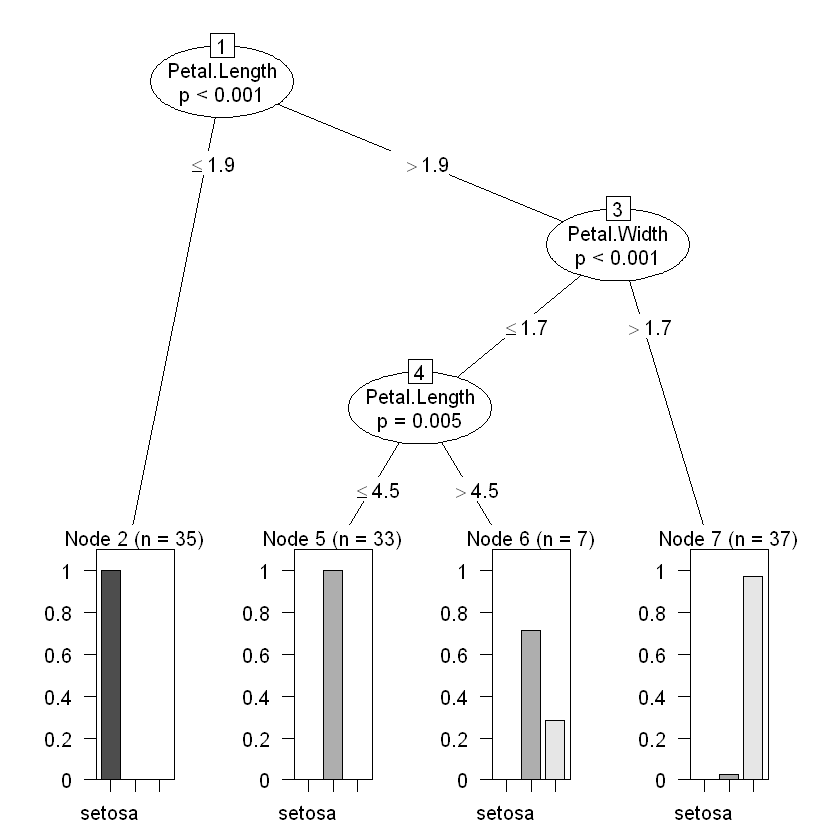

In [13]:
#Plotting the tree
plot(output.tree)

## Naïve Bayes Classifier 

In [14]:
#Load the dataset
data=data.frame(read.csv("--Your File Location--\\bank-full.csv",header =TRUE, sep = ';'))
head(data)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [15]:
is.null(data)

[1] FALSE

In [16]:
#Spliting the dataset in train and test dataset
split = sample.int(n=nrow(data), size=round(.90*(nrow(data))),replace=FALSE)
train_cl = data[split,]
test_cl = data[-split,]
dim(train_cl)


[1] 40690    17

In [17]:
dim(test_cl)

[1] 4521   17

In [18]:
#Creating the model
nB=naiveBayes(y~. , data = train_cl)
summary(nB)

          Length Class  Mode     
apriori    2     table  numeric  
tables    16     -none- list     
levels     2     -none- character
isnumeric 16     -none- logical  
call       4     -none- call     

In [19]:
#Predicting the values for the test cases
y_predict=predict(nB,test_cl)
y_predict

[1] no  no  no  no  no  no  no  yes no  no  no  no  no  no  no  no  no  no 
  [19] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
  [37] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
  [55] yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
  [73] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
  [91] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [109] no  no  no  no  no  no  no  no  no  no  no  yes no  no  no  no  no  no 
 [127] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [145] yes no  no  no  no  no  yes no  no  no  no  no  no  no  no  no  no  no 
 [163] no  no  no  no  no  no  no  no  no  yes no  no  no  no  no  no  no  no 
 [181] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [199] yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [217] no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  no  no 
 [235] yes no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  no 
 [253] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [271] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [289] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [307] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes no 
 [325] no  no  no  no  no  yes no  yes no  no  no  no  no  no  no  no  no  no 
 [343] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [361] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [379] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [397] no  no  no  no  no  no  no  no  yes no  no  no  no  no  no  no  no  no 
 [415] no  no  no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [433] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [451] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [469] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [487] no  no  no  no  no  no  no  no  no  yes no  no  no  no  no  no  no  no 
 [505] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [523] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [541] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [559] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [577] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [595] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [613] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes no 
 [631] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [649] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [667] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [685] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [703] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [721] no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [739] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [757] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [775] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [793] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [811] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [829] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [847] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [865] no  no  no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [883] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [901] no  no  yes no  no  no  no  no  no  no  no  no

In [20]:
#Evaluating the model
table_mat=table(y_predict,test_cl$y)
table_mat

         
y_predict   no  yes
      no  3672  252
      yes  330  267

In [21]:
#Creating the confusion matrix
confusionMatrix(table_mat)

Confusion Matrix and Statistics

         
y_predict   no  yes
      no  3672  252
      yes  330  267
                                          
               Accuracy : 0.8713          
                 95% CI : (0.8612, 0.8809)
    No Information Rate : 0.8852          
    P-Value [Acc > NIR] : 0.998241        
                                          
                  Kappa : 0.4055          
                                          
 Mcnemar's Test P-Value : 0.001414        
                                          
            Sensitivity : 0.9175          
            Specificity : 0.5145          
         Pos Pred Value : 0.9358          
         Neg Pred Value : 0.4472          
             Prevalence : 0.8852          
         Detection Rate : 0.8122          
   Detection Prevalence : 0.8679          
      Balanced Accuracy : 0.7160          
                                          
       'Positive' Class : no              
                                     

## KNN Classifier

In [22]:
df = data.frame(iris)
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [23]:
is.null(df)

[1] FALSE

In [24]:
library(caret)
df$Species=as.numeric(as.factor(df$Species))
split = sample.int(n=nrow(df), size=round(.75*(nrow(df))),replace=FALSE)
train_cl = df[split,]
test_cl = df[-split,]
dim(train_cl)

[1] 112   5

In [25]:
dim(test_cl)

[1] 38  5

In [26]:
kn= knn(train = train_cl,test = test_cl, cl = train_cl$Species, k =5)
kn

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

In [27]:
summary(kn)

1  2  3 
13 12 13

In [28]:
table_mat=table(kn,test_cl$Species)
table_mat


   
kn   1  2  3
  1 13  0  0
  2  0 12  0
  3  0  0 13

In [29]:
confusionMatrix(table_mat)

Confusion Matrix and Statistics

   
kn   1  2  3
  1 13  0  0
  2  0 12  0
  3  0  0 13

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9075, 1)
    No Information Rate : 0.3421     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   1.0000   1.0000
Specificity            1.0000   1.0000   1.0000
Pos Pred Value         1.0000   1.0000   1.0000
Neg Pred Value         1.0000   1.0000   1.0000
Prevalence             0.3421   0.3158   0.3421
Detection Rate         0.3421   0.3158   0.3421
Detection Prevalence   0.3421   0.3158   0.3421
Balanced Accuracy      1.0000   1.0000   1.0000

## SVM Classifier


In [30]:
data = data.frame(iris)
head(data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [31]:
is.null(data)

[1] FALSE

In [32]:
split = sample.int(n=nrow(data), size=round(.90*(nrow(data))),replace=FALSE)
train_cl = data[split,]
test_cl = data[-split,]
dim(train_cl)


[1] 135   5

In [33]:
dim(test_cl)

[1] 15  5

In [34]:
# Create the SVM model.
sv=svm(formula=Species~. , data = train_cl)
summary(sv)


Call:
svm(formula = Species ~ ., data = train_cl)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51

 ( 21 10 20 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [35]:
#Predicting the values for the test cases
y_predict=predict(sv,test_cl)
y_predict

11         14         33         39         50         57         66 
    setosa     setosa     setosa     setosa     setosa versicolor versicolor 
        72         90         99        107        115        116        120 
versicolor versicolor versicolor versicolor  virginica  virginica versicolor 
       130 
 virginica 
Levels: setosa versicolor virginica

In [36]:
#Evaluating the model
table_mat=table(y_predict,test_cl$Species)
table_mat

            
y_predict    setosa versicolor virginica
  setosa          5          0         0
  versicolor      0          5         2
  virginica       0          0         3

# Creating the confusion matrix


In [37]:
confusionMatrix(table_mat)

Confusion Matrix and Statistics

            
y_predict    setosa versicolor virginica
  setosa          5          0         0
  versicolor      0          5         2
  virginica       0          0         3

Overall Statistics
                                          
               Accuracy : 0.8667          
                 95% CI : (0.5954, 0.9834)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 3.143e-05       
                                          
                  Kappa : 0.8             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.6000
Specificity                 1.0000            0.8000           1.0000
Pos Pred Value              1.0000            0.7143           1.0000
Neg Pred Value              1.0000            1.0000           0.8333
Prevalence